In [1]:
from load_modules import *
import copy
from sklearn.decomposition import PCA

In [7]:
file_location = "../../data/Raman_Mouse/noise_removed_used_for_tests/"
filenames =  [f for f in glob.glob(file_location + "/*.txt") if "metadata" not in f.lower()]
filenames = sorted(filenames)
data = load_files([filenames], True)

file_location = "../../data/Raman_Mouse/real_photo_Our/"
filenames =  [f for f in glob.glob(file_location + "/*.txt") if "metadata" not in f.lower()]
filenames = sorted(filenames)
photo_Our = load_files([filenames], True)

file_location = "../../data/Raman_Mouse/real_photo_NN/"
filenames =  [f for f in glob.glob(file_location + "/*.txt") if "metadata" not in f.lower()]
filenames = sorted(filenames)
photo_NN = load_files([filenames], True)


start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#35.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#35.txt
opening file 2 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#36.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#36.txt
opening file 3 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#37.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#37.txt
opening file 4 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#38.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#38.txt
opening file 5 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Kidney_map_150z25_60s_#39.txt
loaded  file 5 of 51: ../

loaded  file 40 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#23.txt
opening file 41 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#24.txt
loaded  file 41 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#24.txt
opening file 42 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#25.txt
loaded  file 42 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#25.txt
opening file 43 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#26.txt
loaded  file 43 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#26.txt
opening file 44 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#27.txt
loaded  file 44 of 51: ../../data/Raman_Mouse/noise_removed_used_for_tests/Muscle_map_150z25_60s_#27.txt
opening file 45 of 51: ../../data/Raman_Mouse/noise_rem

In [9]:
x = data[1][0]
raw_lst = []
for i in range(len(filenames)):
    raw_lst += [data[0][i].reshape(-1,data[0][0].shape[-1])]

photo_our_lst = []
for i in range(len(filenames)):
    photo_our_lst += [raw_lst[i] - photo_Our[0][i].reshape(-1,photo_Our[0][0].shape[-1])]

photo_NN_lst = []
for i in range(len(filenames)):
    photo_NN_lst += [raw_lst[i] - photo_NN[0][i].reshape(-1,photo_NN[0][0].shape[-1])]


In [13]:
shape = photo_NN_lst[0].shape[0] * 51
data = np.concatenate(photo_NN_lst[:10] + photo_our_lst[:10])
# target = np.concatenate((np.ones(shape), np.zeros(shape)))

data2 = np.concatenate(photo_NN_lst[:] + photo_our_lst[:])
target = np.concatenate((np.ones(shape), np.zeros(shape)))

In [14]:
pca = PCA(n_components=20)
pca.fit(data)
x = pca.transform(data2)
y = pca.components_


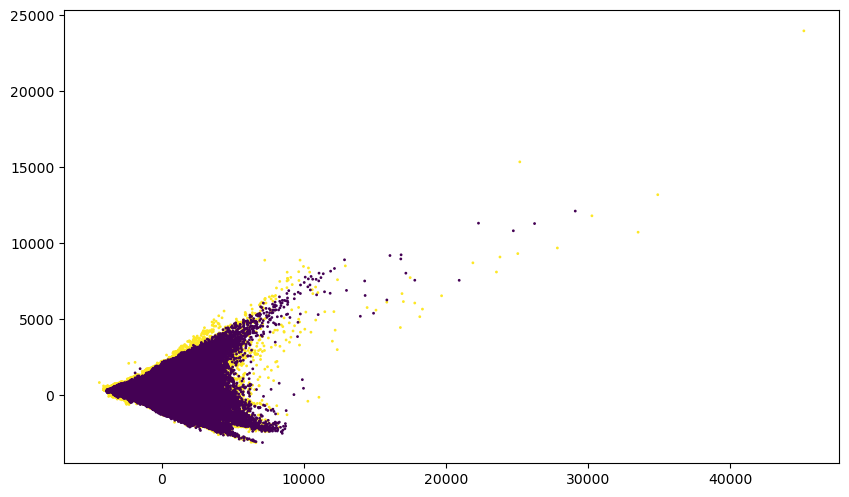

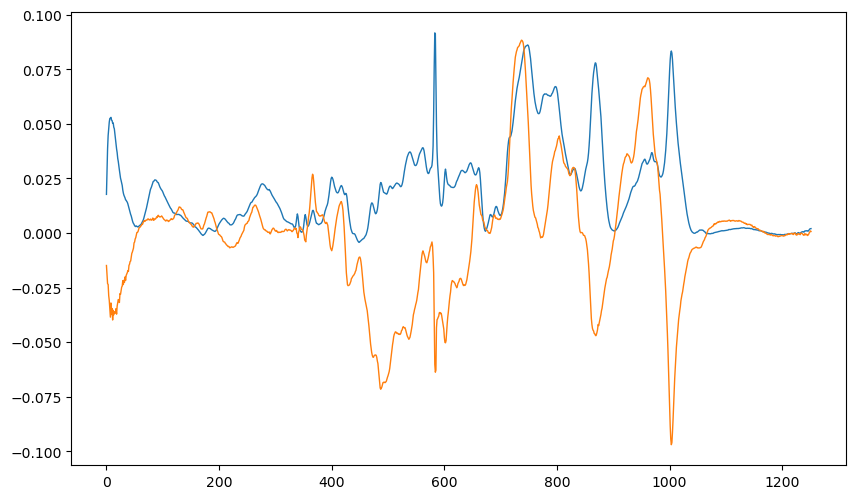

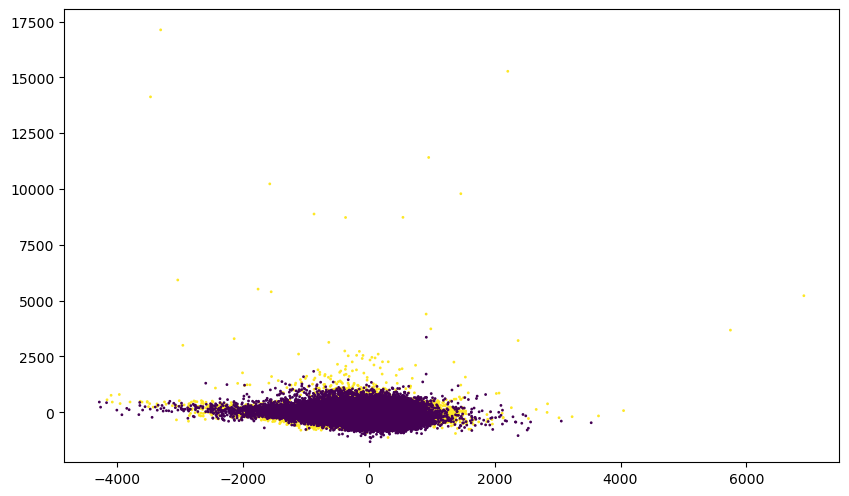

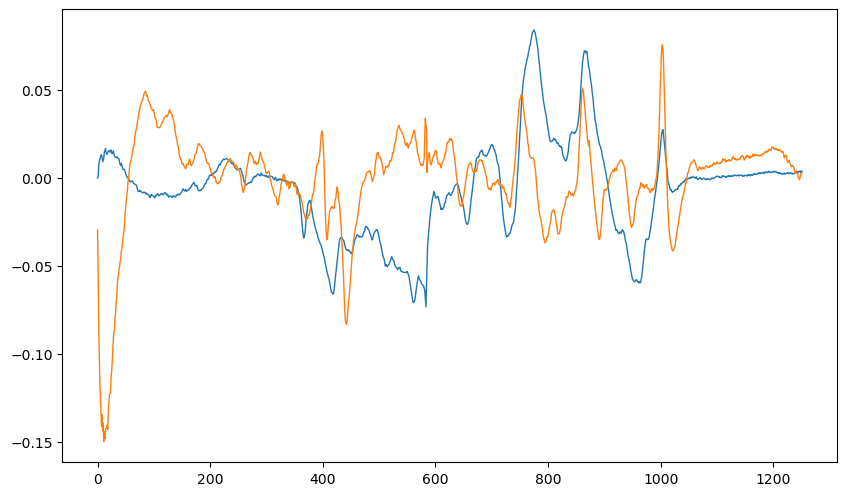

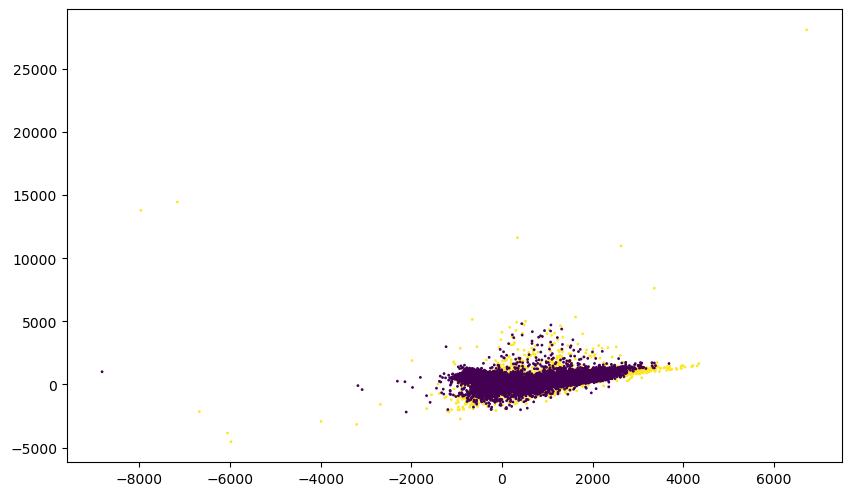

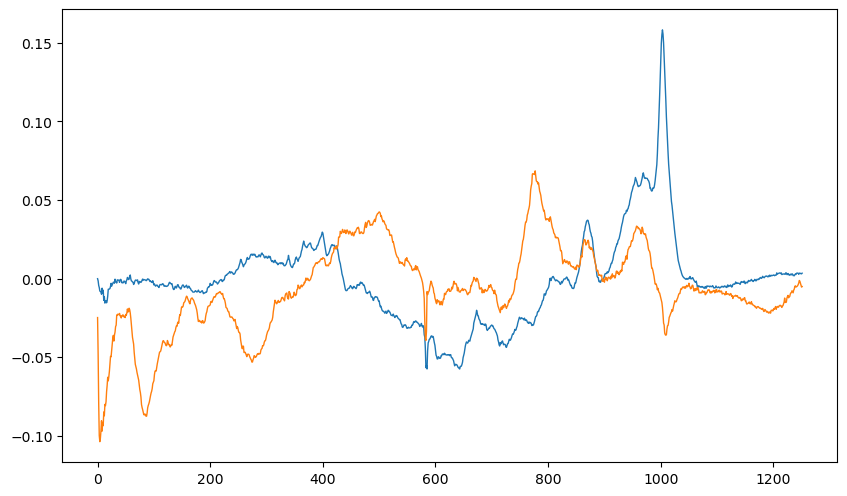

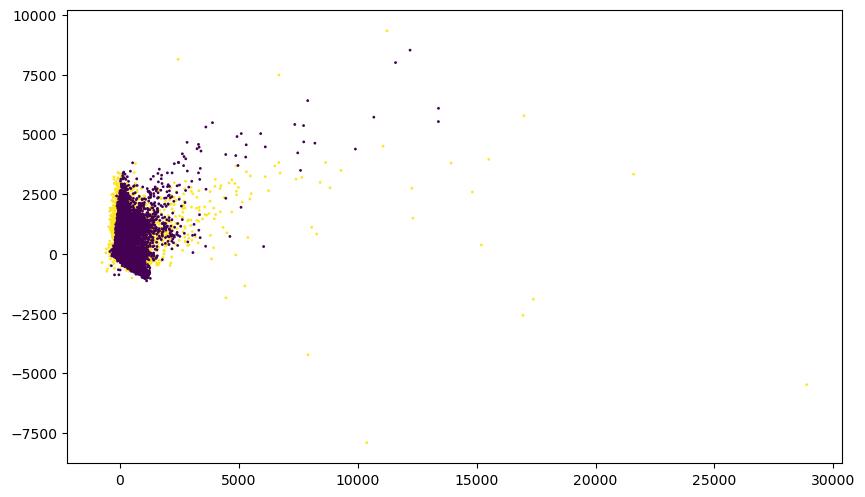

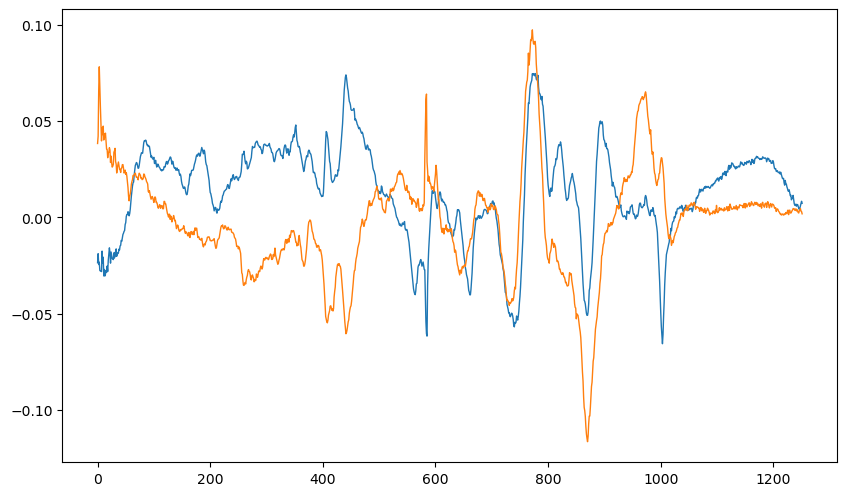

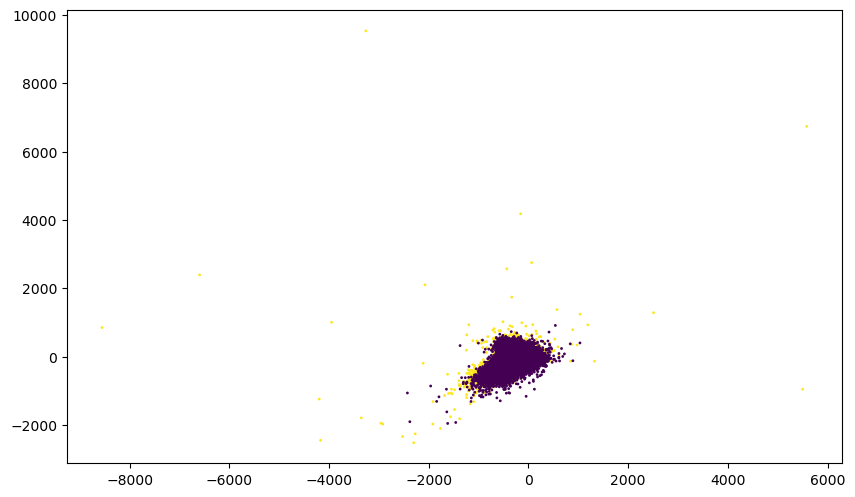

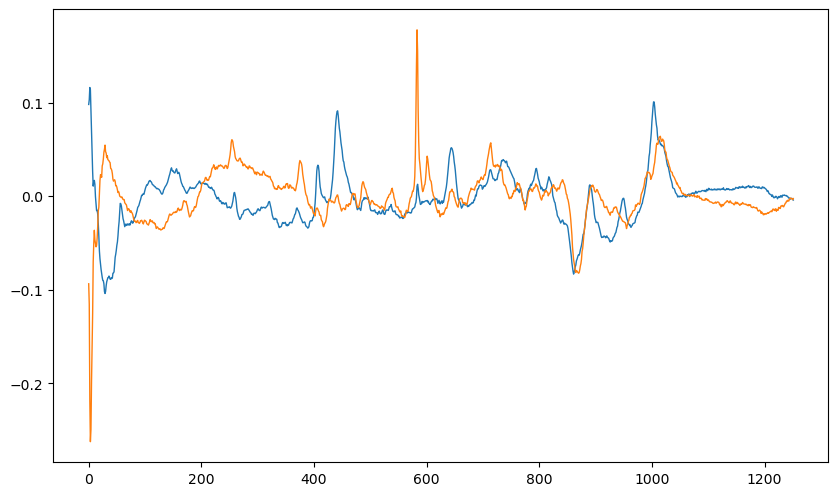

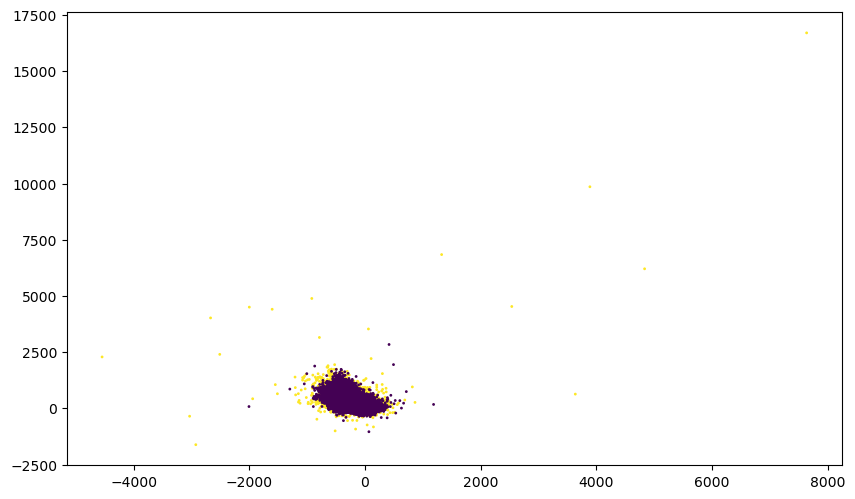

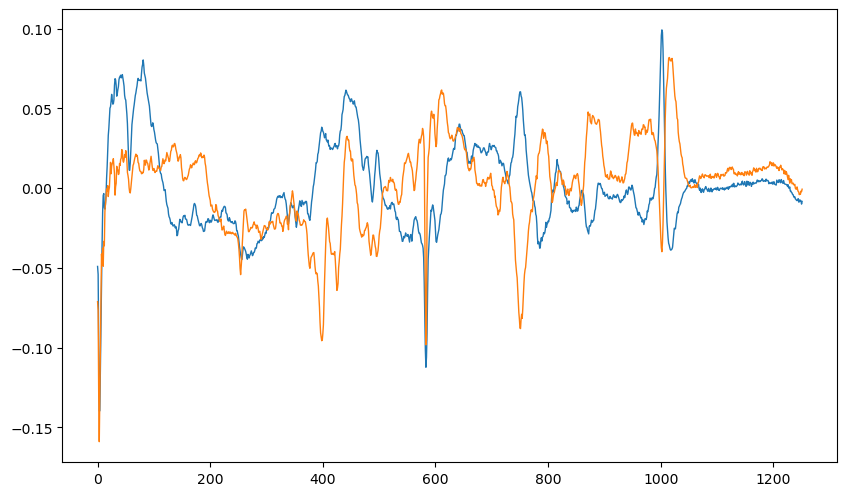

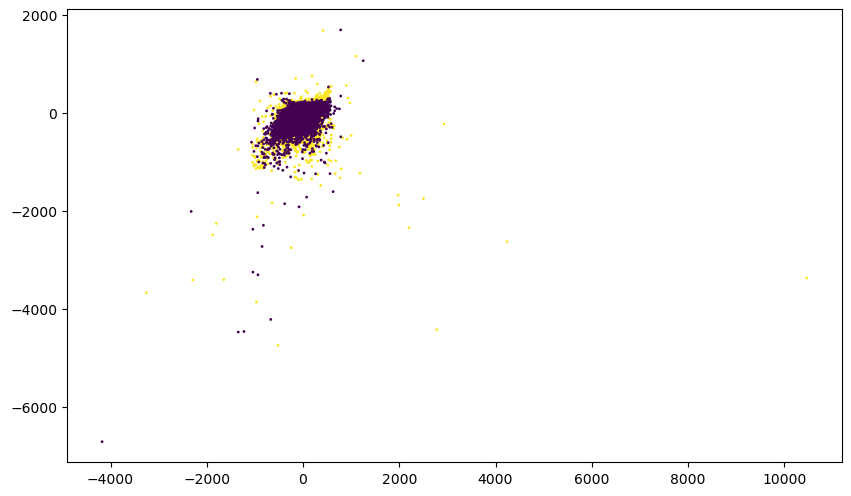

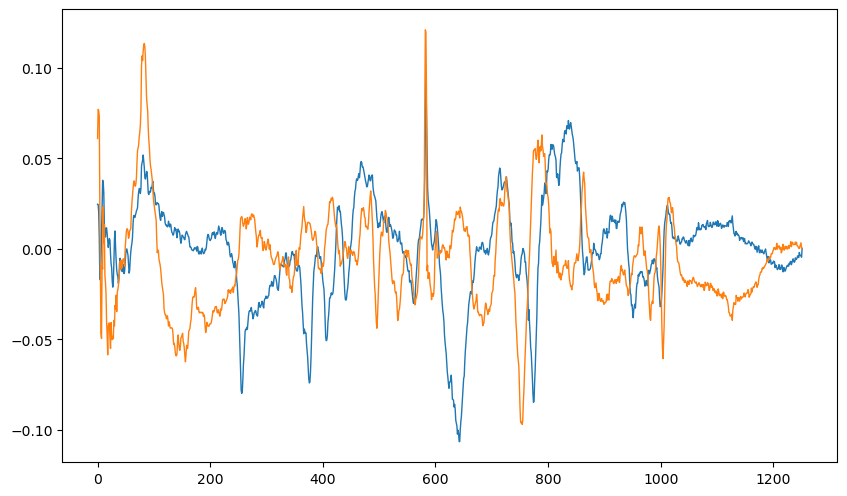

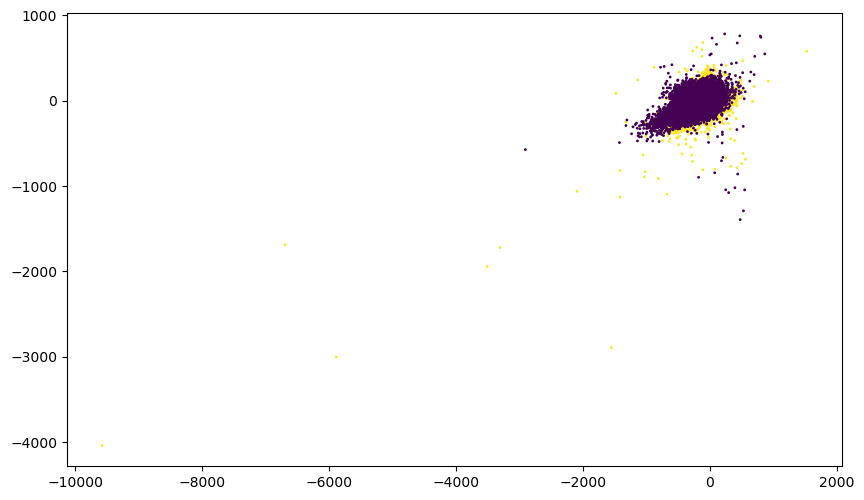

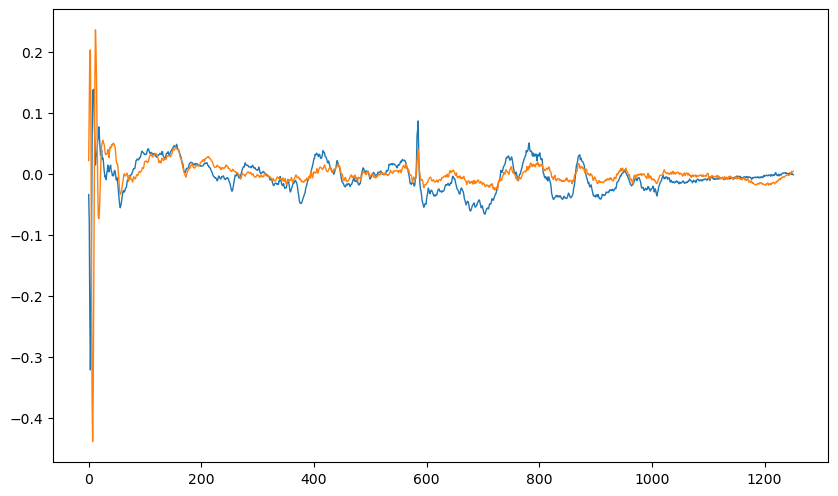

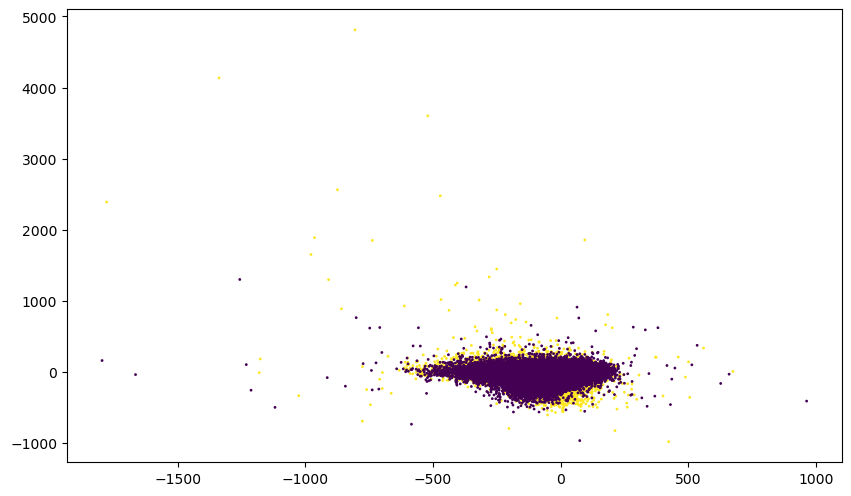

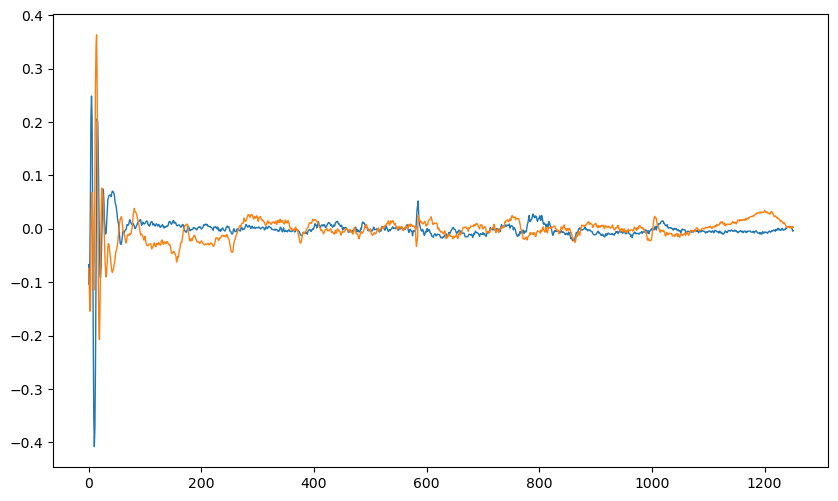

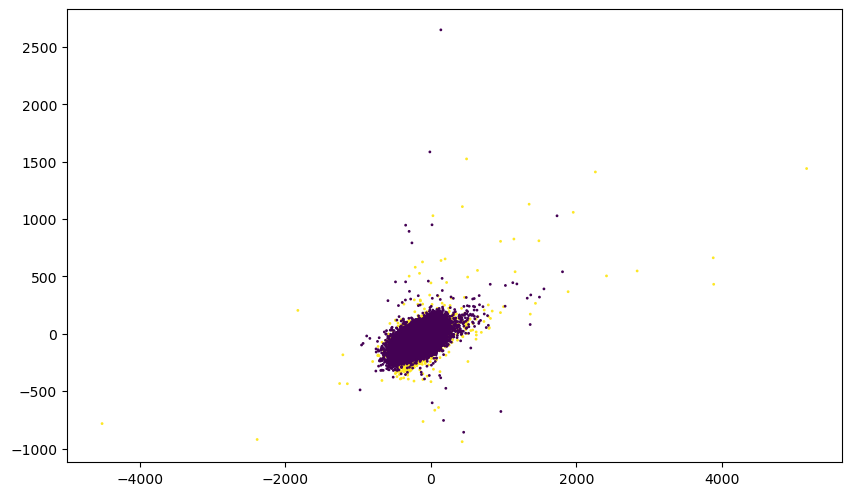

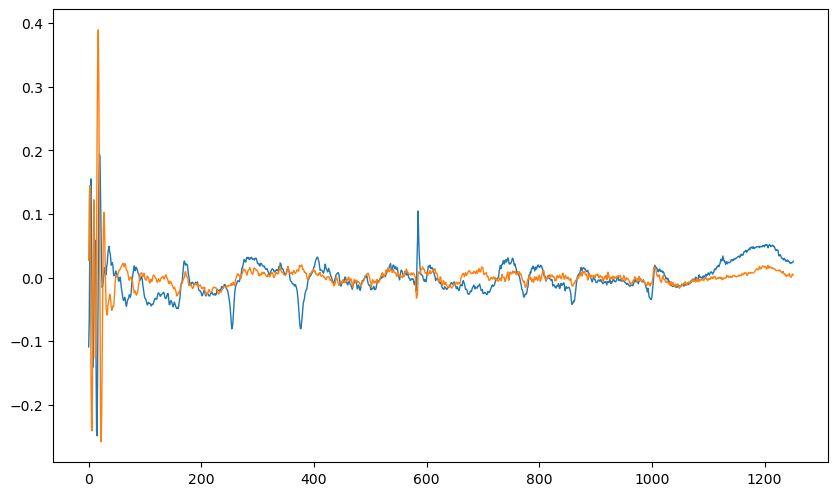

In [15]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

for dim in range(0,20,2):
    
    plt.scatter(x[:, 0+dim], x[:, 1+dim], c=target, s=1)
#     plt.xlim(-30000,50000)
#     plt.ylim(-20000,20000)
    plt.show()
    plt.plot(y[0+dim])
    plt.plot(y[1+dim])
    plt.show()